In [1]:
import numpy as np
import matplotlib.pyplot as plt

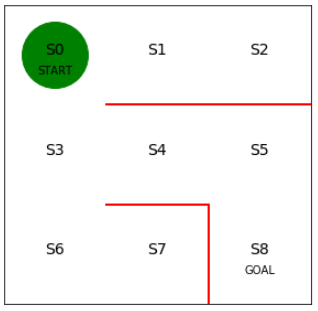

In [2]:
#                      상,  우, 하,  좌                  
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, np.nan, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, 1, np.nan, 1],  # s4
                    [np.nan, np.nan, 1, 1],  # s5
                    [1, 1, np.nan, np.nan],  # s6
                    [np.nan, np.nan, np.nan, 1],  # s7
                    [np.nan, np.nan, np.nan, np.nan], # s8
                    ])

In [3]:
def softmax_convert_into_pi_from_theta(theta):
    '''비율 계산에 소프트맥스 함수 사용'''

    beta = 1.0
    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m, n))

    exp_theta = np.exp(beta * theta)  # theta를 exp(theta)로 변환

    for i in range(0, m):
        # pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        # 단순 비율을 계산하는 코드

        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        # softmax로 계산하는 코드

    pi = np.nan_to_num(pi)  # nan을 0으로 변환

    return pi

direction = ["up", "right", "down", "left"]

def get_action_and_next_s(pi, s):  # 폭
    n = int(np.sqrt(pi.shape[0]))
    
    # pi[s,:]의 확률을 따라, direction값이 선택된다
    next_direction = np.random.choice(direction, p=pi[s, :])

    if next_direction == "up":
        action = 0
        s_next = s - n  # 위로 이동하면 상태값이 3 줄어든다
    elif next_direction == "right":
        action = 1
        s_next = s + 1  # 오른쪽으로 이동하면 상태값이 1 늘어난다
    elif next_direction == "down":
        action = 2
        s_next = s + n  # 아래로 이동하면 상태값이 3 늘어난다
    elif next_direction == "left":
        action = 3
        s_next = s - 1  # 왼쪽으로 이동하면 상태값이 1 줄어든다

    return [action, s_next]


def goal_maze_ret_s_a(pi):
    goal = np.argmin(np.nansum(theta_0, axis=1)) # 8
    s = 0  # 시작 지점
    s_a_history = []

    while (1):  # 목표 지점에 이를 때까지 반복
        [action, next_s] = get_action_and_next_s(pi, s)

        s_a_history.append([s, action, direction[action], next_s])
        
        if next_s == goal:  # 목표 지점에 이르면 종료
            s_a_history.append([goal, np.nan])
            break
        else:
            s = next_s

    return s_a_history


def update_theta(theta, pi, s_a_history):
    eta = 0.1 # 학습률
    T = len(s_a_history) - 1  # 목표 지점에 이르기까지 걸린 단계 수

    [m, n] = theta.shape  # theta의 행렬 크기를 구함
    delta_theta = theta.copy()  # Δtheta를 구할 준비, 포인터 참조이므로 delta_theta = theta로는 안됨

    # delta_theta를 요소 단위로 계산
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):  # theta가 nan이 아닌 경우

                SA_i = [SA for SA in s_a_history if SA[0] == i]
                # 히스토리에서 상태 i인 것만 모아오는 리스트 컴프리헨션

                SA_ij = [SA for SA in s_a_history if SA[0:2] == [i, j]]
                # 상태 i에서 행동 j를 취한 경우만 모음

                N_i = len(SA_i)  # 상태 i에서 모든 행동을 취한 횟수
                N_ij = len(SA_ij)  # 상태 i에서 행동 j를 취한 횟수 
                
                delta_theta[i, j] = (N_ij - pi[i, j] * N_i) / T
                #delta_theta[i, j] = N_ij / T

    new_theta = theta + eta * delta_theta

    return new_theta

In [4]:
softmax_convert_into_pi_from_theta(theta_0)

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [6]:
s_a_history = [[0,0], [1,1], [1,1], [0,1], [3,2], [0,1], [1,2], [0,2], [1,1], [0,1]]
   
i = 0
j = 1
SA_i = [SA for SA in s_a_history if SA[0] == i]
SA_ij = [SA for SA in s_a_history if SA == [i, j]]
N_i = len(SA_i) 
N_ij = len(SA_ij)

print(SA_i)   
print(SA_ij)   
   
print(N_i, N_ij)

T = len(s_a_history) - 1 

p = 0.4
print(N_ij , p * N_i)
(N_ij - p * N_i) / T

[[0, 0], [0, 1], [0, 1], [0, 2], [0, 1]]
[[0, 1], [0, 1], [0, 1]]
5 3
3 2.0


0.1111111111111111

In [7]:
# 정책 수정 없이 현재 목적지 까지 가기
# 같은 정책이라도 랜덤하게 확률적으로 이동하기 때문에 목표까지 가는 단계는 항상 다르다.
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 2, 'down', 3], [3, 2, 'down', 6], [6, 1, 'right', 7], [7, 3, 'left', 6], [6, 0, 'up', 3], [3, 1, 'right', 4], [4, 3, 'left', 3], [3, 0, 'up', 0], [0, 2, 'down', 3], [3, 1, 'right', 4], [4, 1, 'right', 5], [5, 3, 'left', 4], [4, 1, 'right', 5], [5, 3, 'left', 4], [4, 3, 'left', 3], [3, 1, 'right', 4], [4, 1, 'right', 5], [5, 3, 'left', 4], [4, 1, 'right', 5], [5, 3, 'left', 4], [4, 3, 'left', 3], [3, 2, 'down', 6], [6, 0, 'up', 3], [3, 1, 'right', 4], [4, 1, 'right', 5], [5, 3, 'left', 4], [4, 1, 'right', 5], [5, 2, 'down', 8], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 28단계입니다


In [8]:
# 정책 수정 1번 수정
theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(theta)
print(theta)
print(pi)

[[       nan 0.99642857 1.00357143        nan]
 [       nan 1.                nan 1.        ]
 [       nan        nan        nan 1.        ]
 [0.9952381  1.00595238 0.99880952        nan]
 [       nan 1.00535714        nan 0.99464286]
 [       nan        nan 0.99285714 1.00714286]
 [1.00178571 0.99821429        nan        nan]
 [       nan        nan        nan 1.        ]
 [       nan        nan        nan        nan]]
[[0.         0.49821429 0.50178571 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.        ]
 [0.33174651 0.33532005 0.33293344 0.        ]
 [0.         0.50267855 0.         0.49732145]
 [0.         0.         0.49642863 0.50357137]
 [0.50089286 0.49910714 0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


In [9]:
# 정책 수정 한번 더  수정
s_a_history = goal_maze_ret_s_a(pi) 
theta = update_theta(theta, pi, s_a_history)
pi = softmax_convert_into_pi_from_theta(theta)
print(theta)
print(pi)

[[       nan 0.99749628 1.00250372        nan]
 [       nan 0.99791667        nan 1.00208333]
 [       nan        nan        nan 1.        ]
 [0.99387565 1.00453038 1.00159397        nan]
 [       nan 1.00638207        nan 0.99361793]
 [       nan        nan 0.99287202 1.00712798]
 [0.99759673 1.00240327        nan        nan]
 [       nan        nan        nan 1.        ]
 [       nan        nan        nan        nan]]
[[0.         0.49874814 0.50125186 0.        ]
 [0.         0.49895833 0.         0.50104167]
 [0.         0.         0.         1.        ]
 [0.33129478 0.33484351 0.33386171 0.        ]
 [0.         0.50319099 0.         0.49680901]
 [0.         0.         0.49643607 0.50356393]
 [0.49879837 0.50120163 0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


In [10]:
# 4000번 수행
for i in range(4000) :
  s_a_history = goal_maze_ret_s_a(pi) 
  theta = update_theta(theta, pi, s_a_history)
  pi = softmax_convert_into_pi_from_theta(theta)  

In [11]:
print(softmax_convert_into_pi_from_theta(theta_0))
print(softmax_convert_into_pi_from_theta(theta))

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]
[[0.         0.01603445 0.98396555 0.        ]
 [0.         0.28245287 0.         0.71754713]
 [0.         0.         0.         1.        ]
 [0.01109319 0.97869805 0.01020877 0.        ]
 [0.         0.98642288 0.         0.01357712]
 [0.         0.         0.98246869 0.01753131]
 [0.68869827 0.31130173 0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


In [12]:
theta = theta_0.copy()
pi = softmax_convert_into_pi_from_theta(theta_0)
print(pi)

for i in range(4000) :
  s_a_history = goal_maze_ret_s_a(pi) 
  theta = update_theta(theta, pi, s_a_history)
  pi = softmax_convert_into_pi_from_theta(theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.         1.        ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]
[[0.         0.01494517 0.98505483 0.        ]
 [0.         0.30927172 0.         0.69072828]
 [0.         0.         0.         1.        ]
 [0.01245629 0.97781849 0.00972522 0.        ]
 [0.         0.98765931 0.         0.01234069]
 [0.         0.         0.9794099  0.0205901 ]
 [0.64711606 0.35288394 0.         0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.         0.         0.        ]]


In [13]:
pi_current = softmax_convert_into_pi_from_theta(theta)
s_a_history = goal_maze_ret_s_a(pi_current)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")

[[0, 2, 'down', 3], [3, 1, 'right', 4], [4, 1, 'right', 5], [5, 2, 'down', 8], [8, nan]]
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다


# 5 by 5 maze

In [14]:
def makeMaze(n, strs) :   # n by n map 생성
  maze = np.ones((n*n, 4))*np.nan
  direction = ["u", "r", "d", "l"]
  i = 0
  for str in strs :  
    for s in str :
      maze[i, direction.index(s)] = 1.0
    i += 1
  return maze

theta_0 = makeMaze(3, ['rd', 'lr', 'l', 
                    'udr', 'lr', 'ld', 
                    'ur', 'l'])
print(theta_0)

[[nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan nan  1.]
 [ 1.  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [ 1.  1. nan nan]
 [nan nan nan  1.]
 [nan nan nan nan]]


In [15]:
theta_0 = makeMaze(5, ['dr', 'l', 'dr', 'lr', 'l', 
                       'ur', 'lr', 'lru', 'lr', 'ld' ,
                        'dr', 'dl', 'r', 'ld', 'ud' ,
                        'ud', 'ur', 'lr', 'udl', 'ud' ,
                         'ur', 'lr', '', 'ur', 'ul' 
                    ])
print(theta_0)

theta = theta_0.copy()


[[nan  1.  1. nan]
 [nan nan nan  1.]
 [nan  1.  1. nan]
 [nan  1. nan  1.]
 [nan nan nan  1.]
 [ 1.  1. nan nan]
 [nan  1. nan  1.]
 [ 1.  1. nan  1.]
 [nan  1. nan  1.]
 [nan nan  1.  1.]
 [nan  1.  1. nan]
 [nan nan  1.  1.]
 [nan  1. nan nan]
 [nan nan  1.  1.]
 [ 1. nan  1. nan]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [nan  1. nan  1.]
 [ 1. nan  1.  1.]
 [ 1. nan  1. nan]
 [ 1.  1. nan nan]
 [nan  1. nan  1.]
 [nan nan nan nan]
 [ 1.  1. nan nan]
 [ 1. nan nan  1.]]


In [16]:
pi = softmax_convert_into_pi_from_theta(theta_0)
for i in range(9000) :
  s_a_history = goal_maze_ret_s_a(pi) 
  theta = update_theta(theta, pi, s_a_history)
  pi = softmax_convert_into_pi_from_theta(theta)
print(pi)

[[0.         0.15517755 0.84482245 0.        ]
 [0.         0.         0.         1.        ]
 [0.         0.30988897 0.69011103 0.        ]
 [0.         0.42752205 0.         0.57247795]
 [0.         0.         0.         1.        ]
 [0.1361079  0.8638921  0.         0.        ]
 [0.         0.84681794 0.         0.15318206]
 [0.09271792 0.8233623  0.         0.08391977]
 [0.         0.87142145 0.         0.12857855]
 [0.         0.         0.88065025 0.11934975]
 [0.         0.13524086 0.86475914 0.        ]
 [0.         0.         0.14485854 0.85514146]
 [0.         1.         0.         0.        ]
 [0.         0.         0.60046653 0.39953347]
 [0.13795319 0.         0.86204681 0.        ]
 [0.15144106 0.         0.84855894 0.        ]
 [0.86592779 0.13407221 0.         0.        ]
 [0.         0.11315714 0.         0.88684286]
 [0.09840791 0.         0.10246444 0.79912765]
 [0.15099966 0.         0.84900034 0.        ]
 [0.17543472 0.82456528 0.         0.        ]
 [0.         

In [17]:
pi_current = softmax_convert_into_pi_from_theta(theta)
s_a_history = goal_maze_ret_s_a(pi_current)
print(s_a_history)
print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")
print([item[0] for item in s_a_history])

[[0, 2, 'down', 5], [5, 1, 'right', 6], [6, 1, 'right', 7], [7, 1, 'right', 8], [8, 1, 'right', 9], [9, 2, 'down', 14], [14, 2, 'down', 19], [19, 2, 'down', 24], [24, 0, 'up', 19], [19, 2, 'down', 24], [24, 0, 'up', 19], [19, 0, 'up', 14], [14, 2, 'down', 19], [19, 2, 'down', 24], [24, 3, 'left', 23], [23, 0, 'up', 18], [18, 3, 'left', 17], [17, 3, 'left', 16], [16, 0, 'up', 11], [11, 3, 'left', 10], [10, 1, 'right', 11], [11, 3, 'left', 10], [10, 2, 'down', 15], [15, 2, 'down', 20], [20, 1, 'right', 21], [21, 1, 'right', 22], [22, nan]]
목표 지점에 이르기까지 걸린 단계 수는 26단계입니다
[0, 5, 6, 7, 8, 9, 14, 19, 24, 19, 24, 19, 14, 19, 24, 23, 18, 17, 16, 11, 10, 11, 10, 15, 20, 21, 22]


# Q-Learning

In [18]:
#                      상,  우, 하,  좌                  
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, np.nan, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, 1, np.nan, 1],  # s4
                    [np.nan, np.nan, 1, 1],  # s5
                    [1, 1, np.nan, np.nan],  # s6
                    [np.nan, np.nan, np.nan, 1],  # s7
                    [np.nan, np.nan, np.nan, np.nan], # s8
                    ])

In [19]:
def simple_convert_into_pi_from_theta(theta):
    
    [m, n] = theta.shape 
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :]) 

    pi = np.nan_to_num(pi) 

    return pi
pi_0 = simple_convert_into_pi_from_theta(theta_0)    

In [20]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1
print(Q)

[[       nan 0.04192352 0.08144051        nan]
 [       nan 0.0713855         nan 0.01278997]
 [       nan        nan        nan 0.07972172]
 [0.04666241 0.01565372 0.06538589        nan]
 [       nan 0.09827822        nan 0.02920993]
 [       nan        nan 0.00833462 0.06963627]
 [0.03878351 0.09767729        nan        nan]
 [       nan        nan        nan 0.01758705]
 [       nan        nan        nan        nan]]


In [21]:
# ε-greedy 알고리즘 구현

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]

    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action


def get_s_next(s, a):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a] 
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [22]:
# Q러닝 알고리즘으로 행동가치 함수 Q를 수정

def Q_learning(s, a, r, s_next, Q, eta, gamma):

    if s_next == 8:  # 목표 지점에 도달한 경우
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next,: ]) - Q[s, a])

    return Q

In [23]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    direction = ["up", "right", "down", "left"]
    s = 0 
    a = a_next = get_action(s, Q, epsilon, pi) 

    s_a_history = []

    while (1): 
        a = a_next
        s_next = get_s_next(s, a)
        s_a_history.append([s, a,  direction[a], s_next])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)          

        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)
        
        if s_next == 8:   break
        else:  s = s_next

    return [s_a_history, Q]

In [24]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)    
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1


eta = 0.1  # 학습률
gamma = 0.9  # 시간할인율
epsilon = 0.5  # ε-greedy 알고리즘 epsilon 초깃값

for episode in range(20) :
    print("에피소드: " + str(episode+1))
    epsilon = epsilon / 2

    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history) - 1) + "단계입니다")
    
print(s_a_history)

에피소드: 1
목표 지점에 이르기까지 걸린 단계 수는 123단계입니다
에피소드: 2
목표 지점에 이르기까지 걸린 단계 수는 33단계입니다
에피소드: 3
목표 지점에 이르기까지 걸린 단계 수는 33단계입니다
에피소드: 4
목표 지점에 이르기까지 걸린 단계 수는 147단계입니다
에피소드: 5
목표 지점에 이르기까지 걸린 단계 수는 89단계입니다
에피소드: 6
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 7
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 8
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 9
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 10
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 11
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 12
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 13
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 14
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 15
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 16
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 17
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 18
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 19
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
에피소드: 20
목표 지점에 이르기까지 걸린 단계 수는 3단계입니다
[[0, 2, 'down', 3], [3, 1, 'right', 4], [4, 1, 'right', 5], [5, 2, 'down', 8]]
